## Hamoye Stage D
### Planet: Understanding the Amazon from Space
Planet: Understanding the Amazon from Space
Target: Use satellite data to track the human footprint in the Amazon rainforest

Source: https://www.kaggle.com/c/planet-understanding-the-amazon-from-space

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Unzipping data folder in the colab root directory**

In [2]:
!pip install py7zr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.7 MB/s 
     |████████████████████████████████| 357 kB 6.3 MB/s 
     |████████████████████████████████| 2.3 MB 71.0 MB/s 
     |████████████████████████████████| 92 kB 10.5 MB/s 
     |████████████████████████████████| 50 kB 6.7 MB/s 
     |████████████████████████████████| 138 kB 74.1 MB/s 
     |████████████████████████████████| 379 kB 66.2 MB/s 


In [3]:
!pip install brotlicffi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.7 MB 4.1 MB/s 


In [4]:
#Import downloaded modules
import py7zr
import brotlicffi as brotli
import tarfile

In [5]:
# Extract training images
with py7zr.SevenZipFile(f"/content/drive/MyDrive/Hamoye Internship/StageD/Data/train-jpg.tar.7z",mode="r") as z:
  z.extractall("/content")
my_tar = tarfile.open("/content/train-jpg.tar")
my_tar.extractall("/content")
my_tar.close()

In [ ]:
import os
train_imgs = os.listdir("/content/train-jpg")
#print(train_imgs)
print("There are ",len(train_imgs)," training images")


There are  40479  training images


In [ ]:
# Extract test images
with py7zr.SevenZipFile(f"/content/drive/MyDrive/Hamoye Internship/StageD/Data/test-jpg.tar.7z",mode="r") as z:
  z.extractall("/content")
my_tar = tarfile.open("/content/test-jpg.tar")
my_tar.extractall("/content")
my_tar.close()

In [ ]:
test_imgs = os.listdir("/content/test-jpg")
#print(test_imgs)
print("There are ",len(test_imgs)," testing images")

There are  40669  testing images


In [ ]:
# Extract additional test images
with py7zr.SevenZipFile(f"/content/drive/MyDrive/Hamoye Internship/StageD/Data/test-jpg-additional.tar.7z",mode="r") as z:
  z.extractall("/content")
my_tar = tarfile.open("/content/test-jpg-additional.tar")
my_tar.extractall("/content")
my_tar.close()

In [ ]:
add_test_imgs = os.listdir("/content/test-jpg-additional")
print("There are ",len(add_test_imgs)," additional testing images")

There are  20522  additional testing images


**Processinfg csv files and performing certain visualizations**

In [6]:
# Import training csv file
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train_df =  pd.read_csv("/content/drive/MyDrive/Hamoye Internship/StageD/Data/train_v2.csv")
train_df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


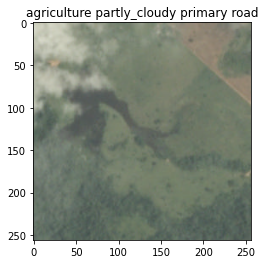

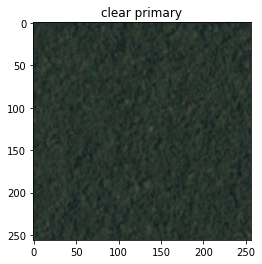

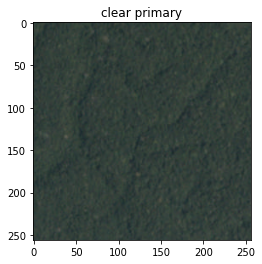

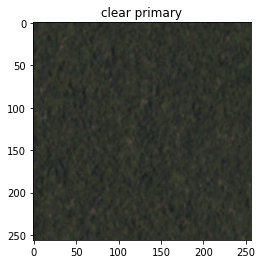

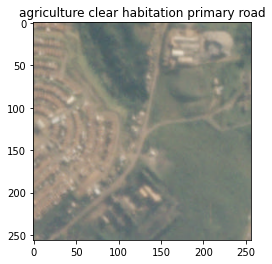

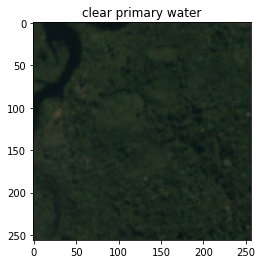

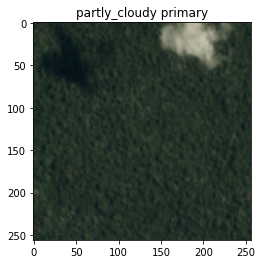

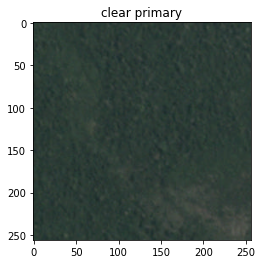

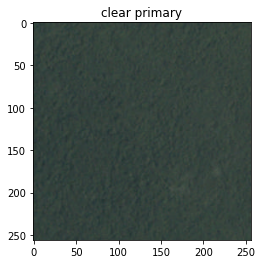

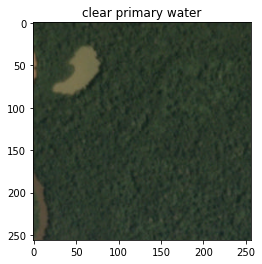

In [ ]:
# Displaying random images and corresponding labels
import random
root = "/content/train-jpg"
train_path = [os.path.join(root,x + ".jpg") for x in train_df["image_name"]]
labels = train_df["tags"]
pairs = list(zip(train_path, labels))  # make pairs out of the two lists
pairs = random.sample(pairs, 10)  # pick 3 random pairs
image_paths, labels = zip(*pairs)
for image_path,label_name in zip(image_paths,labels):
  read_image = plt.imread(image_path)
  plt.title(label_name)
  plt.imshow(read_image)
  plt.show()




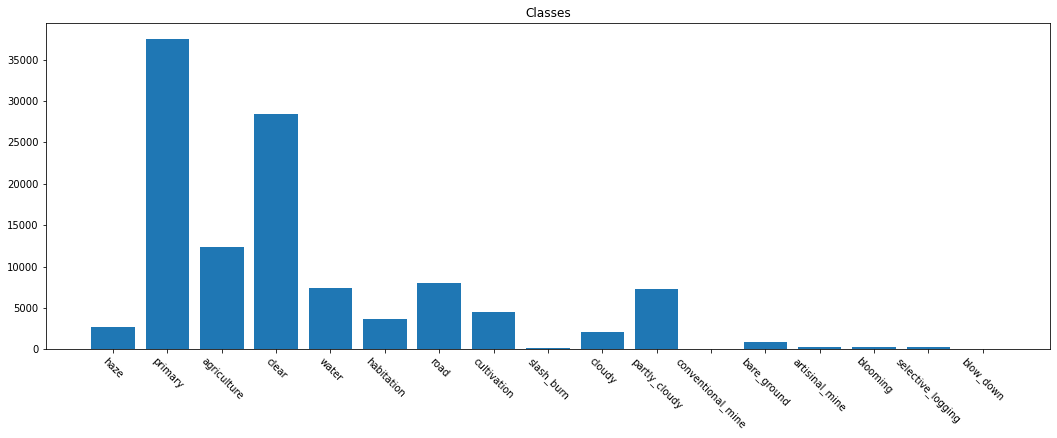

In [ ]:
# Visualize number of unique labels
counts = {}
splitted_tags = train_df['tags'].map(lambda x: x.split(' '))
for labels in splitted_tags.values:
    for label in labels:
        counts[label] = counts[label] + 1  if label in counts else 0

plt.figure(figsize=(18, 6))
plt.title('Classes')
idxs = range(len(counts.values()))
plt.xticks(idxs, counts.keys(), rotation=-45)
plt.bar(idxs, counts.values());

In [ ]:
# Generating a list of all unique labels
label_list = []
for tag_str in train_df.tags.values:
    labels = tag_str.split(' ')
    for label in labels:
        if label not in label_list:
            label_list.append(label)
label_list

['haze',
 'primary',
 'agriculture',
 'clear',
 'water',
 'habitation',
 'road',
 'cultivation',
 'slash_burn',
 'cloudy',
 'partly_cloudy',
 'conventional_mine',
 'bare_ground',
 'artisinal_mine',
 'blooming',
 'selective_logging',
 'blow_down']

In [ ]:
# Add onehot features for every label
for label in label_list:
    train_df[label] = train_df['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)
# Display head
train_df.head()

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


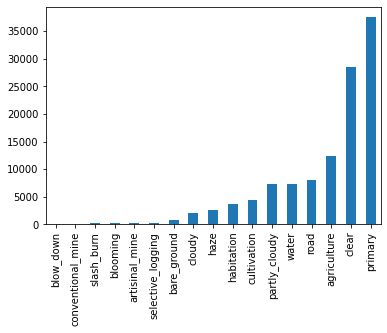

In [ ]:
# Plotting number of instances for each class
train_df[label_list].sum().sort_values().plot.bar()

,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
haze,2697,2670,672,0,613,129,394,202,3,0,0,2,41,5,4,5,0
primary,2670,37513,11972,27668,7001,3469,7728,4455,209,0,7175,94,683,324,332,340,98
agriculture,672,11972,12315,9150,2712,2737,6034,3377,119,0,2493,24,225,38,32,65,22
clear,0,27668,9150,28431,5502,3090,6295,3527,173,0,0,70,747,307,311,308,85
water,613,7001,2712,5502,7411,915,2125,868,24,0,1295,26,206,299,16,49,3
habitation,129,3469,2737,3090,915,3660,2786,895,41,0,441,36,163,29,4,13,3
road,394,7728,6034,6295,2125,2786,8071,1294,36,0,1382,59,323,110,10,151,2
cultivation,202,4455,3377,3527,868,895,1294,4477,126,0,748,4,89,18,35,58,8
slash_burn,3,209,119,173,24,41,36,126,209,0,33,0,10,0,2,2,2
cloudy,0,0,0,0,0,0,0,0,0,2089,0,0,0,0,0,0,0


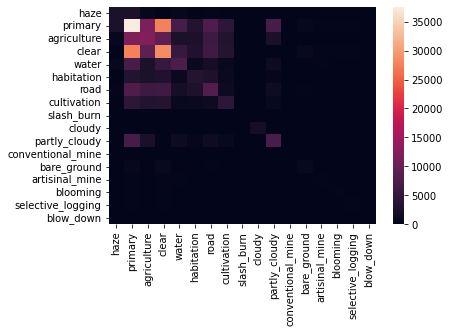

In [ ]:
def make_cooccurence_matrix(labels):
    numeric_df = train_df[labels]; 
    c_matrix = numeric_df.T.dot(numeric_df)
    sns.heatmap(c_matrix)
    return c_matrix
    
# Compute the co-ocurrence matrix
make_cooccurence_matrix(label_list)

,clear,partly_cloudy,haze,cloudy
clear,28431,0,0,0
partly_cloudy,0,7261,0,0
haze,0,0,2697,0
cloudy,0,0,0,2089


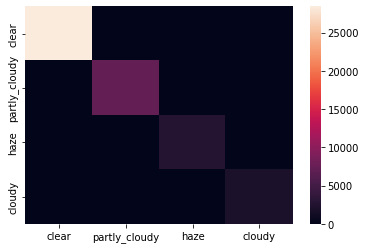

In [ ]:
# Checking weather label of images: each image should have a single weather label
weather_labels = ['clear', 'partly_cloudy', 'haze', 'cloudy']
make_cooccurence_matrix(weather_labels)

,primary,agriculture,water,cultivation,habitation
primary,37513,11972,7001,4455,3469
agriculture,11972,12315,2712,3377,2737
water,7001,2712,7411,868,915
cultivation,4455,3377,868,4477,895
habitation,3469,2737,915,895,3660


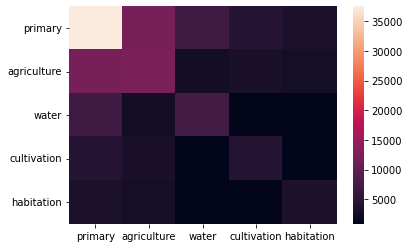

In [ ]:
# Land labels may overlap so let's check
land_labels = ['primary', 'agriculture', 'water', 'cultivation', 'habitation']
make_cooccurence_matrix(land_labels)

,slash_burn,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
slash_burn,209,0,10,0,2,2,2
conventional_mine,0,100,10,4,0,0,0
bare_ground,10,10,862,40,3,13,4
artisinal_mine,0,4,40,339,0,6,0
blooming,2,0,3,0,332,7,1
selective_logging,2,0,13,6,7,340,1
blow_down,2,0,4,0,1,1,98


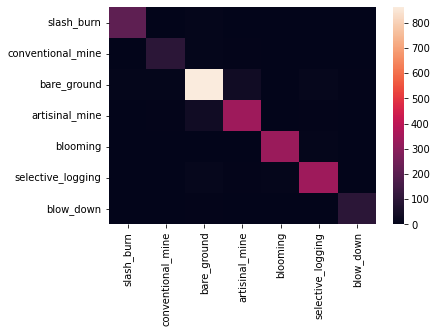

In [ ]:
# Rare labesl
rare_labels = [l for l in label_list if train_df[label_list].sum()[l] < 2000]
make_cooccurence_matrix(rare_labels)

There is a little overlap in rare labels

**Generate training and validation data**

In [7]:
df = train_df.copy()

In [8]:
flatten = lambda l: [item for sublist in l for item in sublist]

#using the lambda function to create our labels
labels = list(set(flatten([l.split(' ') for l in df['tags'].values])))

#Creating our label map
label_map = {l: i for i, l in enumerate(labels)}

In [9]:
from itertools import chain
labels_list = list(chain.from_iterable([tags.split(" ") for tags in df['tags'].values]))
labels_set = set(labels_list)
print("There is {} unique labels including {}".format(len(labels_set), labels_set))


There is 17 unique labels including {'blooming', 'blow_down', 'agriculture', 'selective_logging', 'clear', 'artisinal_mine', 'cloudy', 'road', 'water', 'habitation', 'bare_ground', 'haze', 'conventional_mine', 'partly_cloudy', 'primary', 'cultivation', 'slash_burn'}


In [10]:
# converting the tags columns into one_hot_vectors
for tag in labels_set:
    df[tag] = df['tags'].apply(lambda x: 1 if tag in x.split() else 0)
    
# adding '.jpg' extension to 'image_name'
df['image_name'] = df['image_name'].apply(lambda x: '{}.jpg'.format(x)) 
df.head()

,image_name,tags,blooming,blow_down,agriculture,selective_logging,clear,artisinal_mine,cloudy,road,water,habitation,bare_ground,haze,conventional_mine,partly_cloudy,primary,cultivation,slash_burn
0,train_0.jpg,haze primary,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,train_1.jpg,agriculture clear primary water,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0
2,train_2.jpg,clear primary,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,train_3.jpg,clear primary,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,train_4.jpg,agriculture clear habitation primary road,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0


In [11]:
import tensorflow
from tensorflow import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import fbeta_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, History, ReduceLROnPlateau
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Conv2D, Dropout
from tensorflow.keras.optimizers import Adam
import keras_preprocessing
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np

In [ ]:
# Gnerating training and validation images
train_path = "/content/train-jpg"
y_col = list(df.columns[2:]) 
train_image_gen = tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,validation_split=0.2)

# creating the training set
training_set = train_image_gen.flow_from_dataframe(dataframe=df, directory=train_path, x_col='image_name', y_col=y_col, \
       target_size=(224,224), class_mode='raw', seed=0, batch_size=128, subset='training')

# creating the validation set
validation_set = train_image_gen.flow_from_dataframe(dataframe=df, directory=train_path, x_col='image_name', y_col=y_col, \
       target_size=(224,224), class_mode='raw', seed=0, batch_size=128, subset='validation')

Found 32384 validated image filenames.
Found 8095 validated image filenames.


In [ ]:
from keras import backend as K
# defining a function to help calculate the fbeta_score
def fbeta_score_K(y_true, y_pred):
    beta_squared = 4

    tp = K.sum(y_true * y_pred) + K.epsilon()
    fp = K.sum(y_pred) - tp
    fn = K.sum(y_true) - tp

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    result = (beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon())

    return result

**Training pretrained model:VGG16**

In [ ]:
import tensorflow.keras as keras
# Loading the pre-trained VGG16 architecture module
from tensorflow.keras.applications.vgg16 import VGG16



# Extract the pre - trained architecture
vgg_model = VGG16(input_shape =(224,224,3),include_top =False,weights ='imagenet')
vgg_model.summary()

# Get the output of the base_model formed above
x = vgg_model.output
x = Flatten()(x)
x = Dense (1000 , activation ='relu')(x)
predictions = Dense (17 , activation ='sigmoid')(x)
model = Model(inputs= vgg_model.input,outputs = predictions)

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
history = History()
callbacks = [ EarlyStopping(monitor='val_loss',
                           patience=3,
                           verbose=0)]
             

# setting step size for training and validation image data
step_train_size = int(np.ceil(training_set.samples / training_set.batch_size))
step_val_size = int(np.ceil(validation_set.samples / validation_set.batch_size))

#compiling the model
model.compile(loss='binary_crossentropy', optimizer="Adam", metrics=['accuracy', fbeta_score_K])

# fitting the model
history = model.fit(x=training_set, steps_per_epoch=step_train_size, validation_data=validation_set, validation_steps=step_val_size,
         epochs=20, callbacks=callbacks)

Epoch 1/20
253/253 [==============================] - 498s 2s/step - loss: 0.2612 - accuracy: 0.0338 - fbeta_score_K: 0.6029 - val_loss: 0.1912 - val_accuracy: 0.0322 - val_fbeta_score_K: 0.6668
Epoch 2/20
253/253 [==============================] - 464s 2s/step - loss: 0.1811 - accuracy: 0.0563 - fbeta_score_K: 0.6831 - val_loss: 0.1595 - val_accuracy: 0.0755 - val_fbeta_score_K: 0.7334
Epoch 3/20
253/253 [==============================] - 460s 2s/step - loss: 0.1456 - accuracy: 0.1345 - fbeta_score_K: 0.7488 - val_loss: 0.1422 - val_accuracy: 0.1134 - val_fbeta_score_K: 0.7667
Epoch 4/20
253/253 [==============================] - 460s 2s/step - loss: 0.1366 - accuracy: 0.1474 - fbeta_score_K: 0.7644 - val_loss: 0.1324 - val_accuracy: 0.1377 - val_fbeta_score_K: 0.7759
Epoch 5/20
253/253 [==============================] - 461s 2s/step - loss: 0.1279 - accuracy: 0.1540 - fbeta_score_K: 0.7781 - val_loss: 0.1262 - val_accuracy: 0.1274 - val_fbeta_score_K: 0.7814
Epoch 6/20
253/253 [=====

In [ ]:
# Evaluate model on validation data
scores = model.evaluate(validation_set)

64/64 [==============================] - 38s 591ms/step - loss: 0.1332 - accuracy: 0.1470 - fbeta_score_K: 0.8218


In [ ]:
# Save model
import os
from tensorflow.keras.models import Sequential, model_from_json
# serialize model to JSON
os.chdir("/content/drive/MyDrive/Hamoye/StageD/Model")
model_json = model.to_json()
with open("new_vgg16_1_model.json", "w") as json_file:
    json_file.write(model_json)

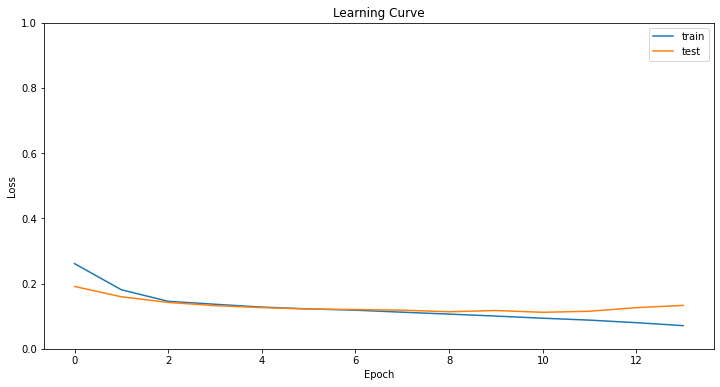

In [ ]:
#plot learning curve
def learning_curve(model_fit, key='acc', ylim=(0.8, 1.01)):
    plt.figure(figsize=(12,6))
    plt.plot(model_fit.history[key])
    plt.plot(model_fit.history['val_' + key])
    plt.title('Learning Curve')
    plt.ylabel(key.title())
    plt.xlabel('Epoch')
    plt.ylim(ylim)
    plt.legend(['train', 'test'], loc='best')
    plt.show()
learning_curve(history,key="loss",ylim=(0,1))  

**Making predictions on test data**

In [ ]:
# Read  sample submission csv
sample_submission = pd.read_csv("/content/drive/MyDrive/Hamoye Internship/StageD/Data/sample_submission_v2.csv")


In [ ]:
#making a copy of the sample submission
sample_copy = sample_submission.copy()
sample_copy['image_name'] = sample_copy['image_name'].apply(lambda x: '{}.jpg'.format(x))
sample_copy.head()


# creating a dataframe for the first 40669 images since we have 2 files for the testing set
test1 = sample_copy.iloc[:40669]['image_name'].reset_index().drop('index', axis=1)
test1.head()

,image_name
0,test_0.jpg
1,test_1.jpg
2,test_2.jpg
3,test_3.jpg
4,test_4.jpg


**Generate first set of test data and making predictions**

In [ ]:
test_image_gen = tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

# generating the image data for the first 40669 images in the sample submission dataframe
test_path = "/content/test-jpg"
test_gen = test_image_gen.flow_from_dataframe(dataframe=test1, \
            directory=test_path, x_col='image_name', y_col=None, \
            batch_size=128, shuffle=False, class_mode=None, target_size=(224,224))


step_test_size1 = int(np.ceil(test_gen.samples / test_gen.batch_size)) 

Found 40669 validated image filenames.


In [ ]:
test_gen.reset() # reseting the generator to be sure of avoiding shuffling
pred = model.predict(test_gen, steps=step_test_size1, verbose=1) # Making predictions for test data

318/318 [==============================] - 196s 616ms/step


In [ ]:
df = train_df.copy()
unique_labels = set()
def append_labels(tags):
    for tag in tags.split():
        unique_labels.add(tag)

train_classes = df.copy()
train_classes['tags'].apply(append_labels)
unique_labels = list(unique_labels)
print(unique_labels)

['blooming', 'artisinal_mine', 'clear', 'selective_logging', 'haze', 'primary', 'road', 'bare_ground', 'slash_burn', 'water', 'agriculture', 'cultivation', 'blow_down', 'habitation', 'partly_cloudy', 'cloudy', 'conventional_mine']


In [ ]:
df.columns

Index(['image_name', 'tags'], dtype='object')

In [ ]:
test_file_names1 = test_gen.filenames # storing the filenames (images names) of the first 40669 images names in \
# the sample submission dataframe as ordered in the prediction as a variable
        
# converting the predictions of the first 40669 to tag names
pred_tags = pd.DataFrame(pred)
pred_tags = pred_tags.apply(lambda x: ' '.join(np.array(unique_labels)[x > 0.5]), axis=1)

# converting the predictions of the first 40669 to a dataframe
import pandas as pd
first_result = pd.DataFrame({'image_name': test_file_names1, 'tags': pred_tags})
print(first_result.head())

   image_name                   tags
0  test_0.jpg          clear primary
1  test_1.jpg          clear primary
2  test_2.jpg  partly_cloudy primary
3  test_3.jpg          clear primary
4  test_4.jpg  partly_cloudy primary


**Generate additional test data and making predictions**

In [ ]:
# selecting the remaining 'image_name'(s) from the submission_sample dataframe to generate image data from 
# test_additional_path
test_additional = sample_copy.iloc[40669:]['image_name'].reset_index().drop('index', axis=1)
test_additional.head()

,image_name
0,file_0.jpg
1,file_1.jpg
2,file_10.jpg
3,file_100.jpg
4,file_1000.jpg


In [ ]:
# initializing an image data generator object for the remaining images in the sample submission dataframe
test_image_gen2 = tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_additional_path = "/content/test-jpg-additional"

# generating the image data for the remaining images in the sample submission dataframe
test_gen2 = test_image_gen2.flow_from_dataframe(dataframe=test_additional, \
            directory=test_additional_path, x_col='image_name', \
            y_col=None, batch_size=128, shuffle=False, class_mode=None, target_size=(224,224))

# setting the step size for the testing set for the remaining images in the sample submission dataframe
step_test_size2 = int(np.ceil(test_gen2.samples / test_gen2.batch_size))


test_gen2.reset() # reseting the generator to be sure of avoiding shuffling
pred2 = model.predict(test_gen2, steps=step_test_size2, verbose=1) 

Found 20522 validated image filenames.
161/161 [==============================] - 104s 646ms/step


In [ ]:
test_file_names2 = test_gen2.filenames 
        
# converting the predictions of the remaining images to tag names
pred_tags2 = pd.DataFrame(pred2)
pred_tags2 = pred_tags2.apply(lambda x: ' '.join(np.array(unique_labels)[x > 0.5]), axis=1)

# converting the predictions of the remaining to a dataframe
second_result= pd.DataFrame({'image_name': test_file_names2, 'tags': pred_tags2})
print(second_result.head())

      image_name                                    tags
0     file_0.jpg                           clear primary
1     file_1.jpg  agriculture road partly_cloudy primary
2    file_10.jpg                           water primary
3   file_100.jpg                     clear water primary
4  file_1000.jpg                           clear primary


In [ ]:
# joining the result of the test data and the additional files as final predictions
final_result = pd.concat([first_result,second_result]) 
final_result = final_result.reset_index().drop('index', axis=1)
final_result.head()

,image_name,tags
0,test_0.jpg,clear primary
1,test_1.jpg,clear primary
2,test_2.jpg,partly_cloudy primary
3,test_3.jpg,clear primary
4,test_4.jpg,partly_cloudy primary


In [ ]:
# removing the jpegs extension back from the dataframe
final_result['image_name'] = final_result['image_name'].apply(lambda x: x[:-4])
final_result.head()

,image_name,tags
0,test_0,clear primary
1,test_1,clear primary
2,test_2,partly_cloudy primary
3,test_3,clear primary
4,test_4,partly_cloudy primary


**Training VGG16 with full data**

- Vgg16 will be trained on full data,20 epochs will be used since the model started overfitting on validation data at epoch 15 when data was divided into training and validation set.The epoch is increased since we are adding more data

In [ ]:
df.head()

,image_name,tags,habitation,artisinal_mine,blooming,conventional_mine,slash_burn,cloudy,selective_logging,clear,haze,water,partly_cloudy,cultivation,road,blow_down,agriculture,bare_ground,primary
0,train_0.jpg,haze primary,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,train_1.jpg,agriculture clear primary water,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1
2,train_2.jpg,clear primary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,train_3.jpg,clear primary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,train_4.jpg,agriculture clear habitation primary road,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1


In [ ]:
import tensorflow.keras as keras
# Loading the pre-trained VGG16 architecture module
from tensorflow.keras.applications.vgg16 import VGG16



# Extract the pre - trained architecture
vgg_model = VGG16(input_shape =(224,224,3),include_top =False,weights ='imagenet')
vgg_model.summary()

# Get the output of the base_model formed above
x = vgg_model.output
x = Flatten()(x)
x = Dense (1000 , activation ='relu')(x)
predictions = Dense (17 , activation ='sigmoid')(x)
model = Model(inputs= vgg_model.input,outputs = predictions)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
#Generating all images for training
train_path = "/content/train-jpg"
y_col = list(df.columns[2:]) 
train_image_gen = tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

# creating the training set
training_set = train_image_gen.flow_from_dataframe(dataframe=df, directory=train_path, x_col='image_name', y_col=y_col, \
       target_size=(224,224), class_mode='raw', seed=0, batch_size=128, subset=None)

Found 40479 validated image filenames.


**Training VGG16 on full data**

In [ ]:
history = History()
callbacks = [ EarlyStopping(monitor='val_loss',
                           patience=3,
                           verbose=0)]
             

# setting step size for training  image data
step_train_size = int(np.ceil(training_set.samples / training_set.batch_size))

#compiling the model
model.compile(loss='binary_crossentropy', optimizer="Adam", metrics=['accuracy', fbeta_score_K])

# fitting the model
history = model.fit(x=training_set, steps_per_epoch=step_train_size, validation_data=None,epochs=20)

Epoch 1/17
317/317 [==============================] - 579s 2s/step - loss: 0.2511 - accuracy: 0.1947 - fbeta_score_K: 0.6219
Epoch 2/17
317/317 [==============================] - 541s 2s/step - loss: 0.1650 - accuracy: 0.2749 - fbeta_score_K: 0.7142
Epoch 3/17
317/317 [==============================] - 541s 2s/step - loss: 0.1470 - accuracy: 0.2557 - fbeta_score_K: 0.7439
Epoch 4/17
317/317 [==============================] - 540s 2s/step - loss: 0.1371 - accuracy: 0.2374 - fbeta_score_K: 0.7609
Epoch 5/17
317/317 [==============================] - 541s 2s/step - loss: 0.1299 - accuracy: 0.2305 - fbeta_score_K: 0.7741
Epoch 6/17
317/317 [==============================] - 540s 2s/step - loss: 0.1250 - accuracy: 0.2388 - fbeta_score_K: 0.7828
Epoch 7/17
317/317 [==============================] - 540s 2s/step - loss: 0.1208 - accuracy: 0.2403 - fbeta_score_K: 0.7911
Epoch 8/17
317/317 [==============================] - 539s 2s/step - loss: 0.1163 - accuracy: 0.2421 - fbeta_score_K: 0.7994


In [ ]:
 # Save model
import os
from tensorflow.keras.models import Sequential, model_from_json
# serialize model to JSON
os.chdir("/content/drive/MyDrive/Hamoye Internship/StageD/Model")
model_json = model.to_json()
with open("new_vgg16_fulldata_2_sub3_model.json", "w") as json_file:
    json_file.write(model_json)  

**Make predictions on test data with vgg16 trained on all images**

*Making predictions on first set of test data*

In [ ]:
test_image_gen = tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

# generating the image data for the first 40669 images in the sample submission dataframe
test_path = "/content/test-jpg"
test_gen = test_image_gen.flow_from_dataframe(dataframe=test1, \
            directory=test_path, x_col='image_name', y_col=None, \
            batch_size=128, shuffle=False, class_mode=None, target_size=(224,224))


step_test_size1 = int(np.ceil(test_gen.samples / test_gen.batch_size)) 

Found 40669 validated image filenames.


In [ ]:
#Load trained model
#load json and create model
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('/content/drive/MyDrive/Hamoye Internship/StageD/Model/new_vgg16_full_data_1_sub3_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)


In [ ]:
test_gen.reset() # reseting the generator to be sure of avoiding shuffling
pred = model.predict(test_gen, steps=step_test_size1, verbose=1) # Making predictions for test data

318/318 [==============================] - 202s 634ms/step


In [ ]:
test_file_names1 = test_gen.filenames # storing the filenames (images names) of the first 40669 images names in \
# the sample submission dataframe as ordered in the prediction as a variable
        
# converting the predictions of the first 40669 to tag names
pred_tags = pd.DataFrame(pred)
pred_tags = pred_tags.apply(lambda x: ' '.join(np.array(unique_labels)[x > 0.5]), axis=1)

# converting the predictions of the first 40669 to a dataframe
import pandas as pd
first_result = pd.DataFrame({'image_name': test_file_names1, 'tags': pred_tags})
print(first_result.head())

   image_name                   tags
0  test_0.jpg          clear primary
1  test_1.jpg          clear primary
2  test_2.jpg  primary partly_cloudy
3  test_3.jpg          clear primary
4  test_4.jpg  primary partly_cloudy


*Making predictions on additional test data*

In [ ]:
# initializing an image data generator object for the remaining images in the sample submission dataframe
test_image_gen2 = tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_additional_path = "/content/test-jpg-additional"

# generating the image data for the remaining images in the sample submission dataframe
test_gen2 = test_image_gen2.flow_from_dataframe(dataframe=test_additional, \
            directory=test_additional_path, x_col='image_name', \
            y_col=None, batch_size=128, shuffle=False, class_mode=None, target_size=(224,224))

# setting the step size for the testing set for the remaining images in the sample submission dataframe
step_test_size2 = int(np.ceil(test_gen2.samples / test_gen2.batch_size))


test_gen2.reset() # reseting the generator to be sure of avoiding shuffling
pred2 = model.predict(test_gen2, steps=step_test_size2, verbose=1) 

Found 20522 validated image filenames.
161/161 [==============================] - 101s 630ms/step


In [ ]:
test_file_names2 = test_gen2.filenames 
        
# converting the predictions of the remaining images to tag names
pred_tags2 = pd.DataFrame(pred2)
pred_tags2 = pred_tags2.apply(lambda x: ' '.join(np.array(unique_labels)[x > 0.5]), axis=1)

# converting the predictions of the remaining to a dataframe
second_result= pd.DataFrame({'image_name': test_file_names2, 'tags': pred_tags2})
print(second_result.head())

      image_name                                  tags
0     file_0.jpg                         clear primary
1     file_1.jpg     primary agriculture partly_cloudy
2    file_10.jpg  clear haze primary water agriculture
3   file_100.jpg                   clear primary water
4  file_1000.jpg                         clear primary


In [ ]:
# joining the result of the test data and the additional files as final predictions
final_result = pd.concat([first_result,second_result]) 
final_result = final_result.reset_index().drop('index', axis=1)
final_result.head(40)

,image_name,tags
0,test_0.jpg,clear primary
1,test_1.jpg,clear primary
2,test_2.jpg,primary partly_cloudy
3,test_3.jpg,clear primary
4,test_4.jpg,primary partly_cloudy
5,test_5.jpg,clear primary
6,test_6.jpg,primary agriculture cultivation habitation par...
7,test_7.jpg,clear primary road habitation
8,test_8.jpg,clear primary
9,test_9.jpg,haze primary agriculture


In [ ]:
# removing the jpegs extension back from the dataframe
final_result['image_name'] = final_result['image_name'].apply(lambda x: x[:-4])
final_result.head()

,image_name,tags
0,test_0,clear primary
1,test_1,clear primary
2,test_2,primary partly_cloudy
3,test_3,clear primary
4,test_4,primary partly_cloudy


In [ ]:
#Save submission file
os.chdir("/content/drive/MyDrive/Hamoye Internship/StageD/Submissions")
final_result.to_csv("sub__4_vgg16_full_imgs_1.csv",index=False)